# JC3503 Assignment - Apartments

---

Student Name: Ruitao Wang

Student Email: u12rw21@abdn.ac.uk

Student ID: 50079672

---

Additional information about the dataset: https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

In [1]:
# Add any pre-requisites or libraries here
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.cluster import KMeans

In [2]:
# Import the data
df = pd.read_csv("./data/apartments.csv", low_memory=False)

Some tips before analysis:
* markdown with introduction conttent in the analysis will be labelled with 📍.
* markdown with summary content in the analysis will be labelled with 🔖.
* markdown with reflective analysis will be labelled with 📌.

## Exploratory Data Analysis (EDA)

📍 The process includes two aspects of content:
* understand the data, including basic information and summary statistics.
* clean the dataset
    - duplicated rows
    - missing values
    - extreme outliers
    - erroneous values


Drop the duplicate row firstly.

In [4]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(99492, 22)
(99408, 22)


There are 84 duplicated rows.

In [5]:
# check the columns
print(df.columns)

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')


In [6]:
# check the first five rows
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [7]:
# the basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99408 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99408 non-null  int64  
 1   category       99408 non-null  object 
 2   title          99408 non-null  object 
 3   body           99408 non-null  object 
 4   amenities      83374 non-null  object 
 5   bathrooms      99345 non-null  float64
 6   bedrooms       99284 non-null  float64
 7   currency       99408 non-null  object 
 8   fee            99408 non-null  object 
 9   has_photo      99408 non-null  object 
 10  pets_allowed   39034 non-null  object 
 11  price          99407 non-null  float64
 12  price_display  99407 non-null  object 
 13  price_type     99408 non-null  object 
 14  square_feet    99408 non-null  int64  
 15  address        7942 non-null   object 
 16  cityname       99106 non-null  object 
 17  state          99106 non-null  object 
 18  latitude   

We find that there are some null values in the dataset. Check the NaN values in each column.

In [8]:
# the total nan of each column
df.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        16034
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60374
price                1
price_display        1
price_type           0
square_feet          0
address          91466
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [9]:
# check 'title' column's values for missing values
missing_bedrooms = df['bedrooms'].isnull()
df.loc[missing_bedrooms, 'title']

790                        Studio apartment 606 Spokane Ct
1653                    Studio apartment 11 Calle de Arena
5024                Studio apartment 303-319 Market Street
7212                           bedroom in Medford MA 02155
7245     A-P-T Suites Lakeland - Low Weekly & Monthly R...
                               ...                        
96832    Commuter's Dream in highly desirable Conshohoc...
96851                 Apartment in great location. Cat OK!
97943                       Apartment for rent in Houston.
98703                 Apartment in prime location. Pet OK!
99416                  LOCATION LOCATION LOCATION. Pet OK!
Name: title, Length: 124, dtype: object

We can find that there is always no bedroom information in the title. Therefore, we cannot fill the missing bedrooms with 'title'.

In [10]:
# get the row with missing 'cityname'
missing_city = df['cityname'].isnull()
print(missing_city.sum())

# check these rows
df.loc[missing_city, 'body']

302


5340     This unit is located at 1265 North Chrisden St...
5464     This unit is located at 3501 Terrace Dr, Suitl...
5501     This unit is located at 9511 81st Street, Plea...
5502     This unit is located at 1526 Dresden Drive NE,...
5503     This unit is located at 331 LIKELY CT ALAMO, C...
                               ...                        
79937    - Receive HALF off your first month s rent! Ex...
79938    Spacious open floor plan. Complete Kitchen wit...
79940    Mayflower Apartments is the perfect for you. S...
79941    HOMEOWNER IS OFFERING HALF OFF 1st FULL MONTHS...
83416    Melbourne, 3000 (Note State: Victoria, Austral...
Name: body, Length: 302, dtype: object

Some 'body' part include the city information. However, some are not.

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

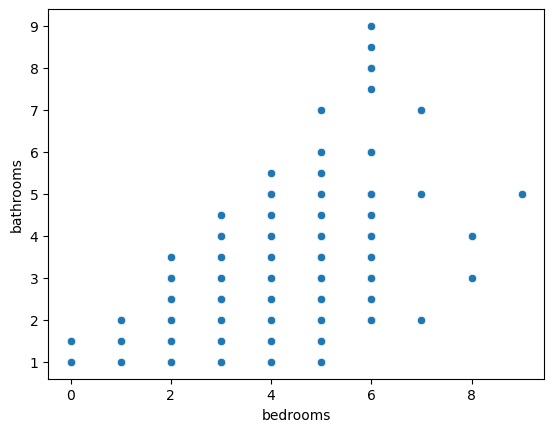

In [11]:
# check the relationship between the number of bedrooms and bathrooms
df_bb = df[['bedrooms', 'bathrooms']]
sns.scatterplot(x='bedrooms', y='bathrooms', data=df_bb)

There seems the number of bedrooms is proportional to the number of bathrooms. However, the linear regression model does not seem to be a good fit for this data.

🔖 To learn data better, we fill the missing values firstly according to the observation of the missing values. Then, we can research the distribution of the data. \
Strategy of filling the missing values:
* `amenities`: If the value is null, that is means there is no amenities. We fill the missing values with "basis" which represent the house has basic amenities. Every row should add 'basis'.
* `bedrooms`: There is no information about bedrooms in the 'title' or 'body'. Drop it later.
* `bathrooms`: We can fill the number of bathrooms according to the bedrooms, which is in line with common sense.
* `pets_allowed`: We can fill the missing values with "No".
* `price, price_display`: There is only one row and  we can delete it for convenience.
* `address`: There are 91466 missing values, which is a large proportion. However, we can conclude address according to latitude and longitude. So we drop this column.
* `cityname, state`: Some missing values can be found in "body" column. However, some information are missing. Therefore, we just fill 'not given' to all of these. The correct values will be filled later if needed.
* `latitude, longitude`: To fill the missing values correctly, we need to access more complex service like Google Maps API. For convenience, we can just fill them with the mean values.

In [12]:
# drop Nans in 'price', 'price_display', 'bedrooms'
df = df.dropna(subset = ['price', 'price_display', 'bedrooms'])

# add 'basis' to amenities
df['amenities'].fillna('', inplace=True)
df['amenities'] = df['amenities'].apply(lambda x: 'basis,'+x if x != '' else 'basis')

# fill 'No' in 'amenities' and 'pets_allowed'
df['pets_allowed'].fillna('No', inplace=True)

# fill missing values in 'bathrooms'
missing_bathrooms = df['bathrooms'].isnull()
df.loc[missing_bathrooms, 'bathrooms'] = df.loc[missing_bathrooms, 'bedrooms']

# drop 'address'
df.drop('address', axis=1, inplace=True)

# fill missing values in 'cityname', 'state'
df['cityname'].fillna('not given', inplace=True)
df['state'].fillna('not given', inplace=True)

# fill mean in 'latitude', 'longitude'
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_4660\4160824953.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amenities'].fillna('', inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_4660\4160824953.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [13]:
# check the Nans again
df.isnull().sum()

id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64

After we deal with missing values, get the overview of the data.

In [14]:
# get the columns which contains categorical values of dataset
cat_cols = ['category', 'currency', 'fee', 'has_photo', 'pets_allowed', 'price_type', 'cityname', 'state', 'source']

# check the categorical value and its quantity
for col in cat_cols:
  print(df[str(col)].value_counts())
  print('-' * 50)

category
housing/rent/apartment            99222
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64
-----------------------------------------------------------------------
currency
USD    99283
Name: count, dtype: int64
-----------------------------------------------------------------------
fee
No     99086
Yes      197
Name: count, dtype: int64
-----------------------------------------------------------------------
has_photo
Yes          55850
Thumbnail    34246
No            9187
Name: count, dtype: int64
-----------------------------------------------------------------------
pets_allowed
No                60280
Cats,Dogs         37039
Cats               1836
Dogs                127
Cats,Dogs,None        1
Name: count, dtype: int64
-----------------------------------------

The 'pets_allowed' column has value in wrong format st.

> pets_allowed  
> No                
> Cats,Dogs         
> Cats               
> Dogs                
> Cats,Dogs,None        

'Cats, Dogs, None' is the same as 'Cats, Dogs'. So we modify it to correct format.

In [15]:
# modify the format and check the modification
df.loc[df['pets_allowed'] == 'Cats,Dogs,None', 'pets_allowed'] = 'Cats,Dogs'
print(df['pets_allowed'].value_counts())

pets_allowed
No           60280
Cats,Dogs    37040
Cats          1836
Dogs           127
Name: count, dtype: int64


In addition, the 'category' column exists undefined values 'housing/rent'. No category specific data is available. We can group these data to 'housing/rent/other'.

In [16]:
# modify 'housing/rent'
df.loc[df['category'] == 'housing/rent', 'category'] = 'housing/rent/other'
print(df['category'].value_counts())

category
housing/rent/apartment            99222
housing/rent/commercial/retail       42
housing/rent/other                    8
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
Name: count, dtype: int64


In [17]:
# preprocess the 'category' column to delete prefix.
df['category'] = df['category'].str.replace('housing/rent/', '', regex=False)
print(df['category'].value_counts())

category
apartment            99222
commercial/retail       42
other                    8
home                     4
short_term               4
condo                    3
Name: count, dtype: int64


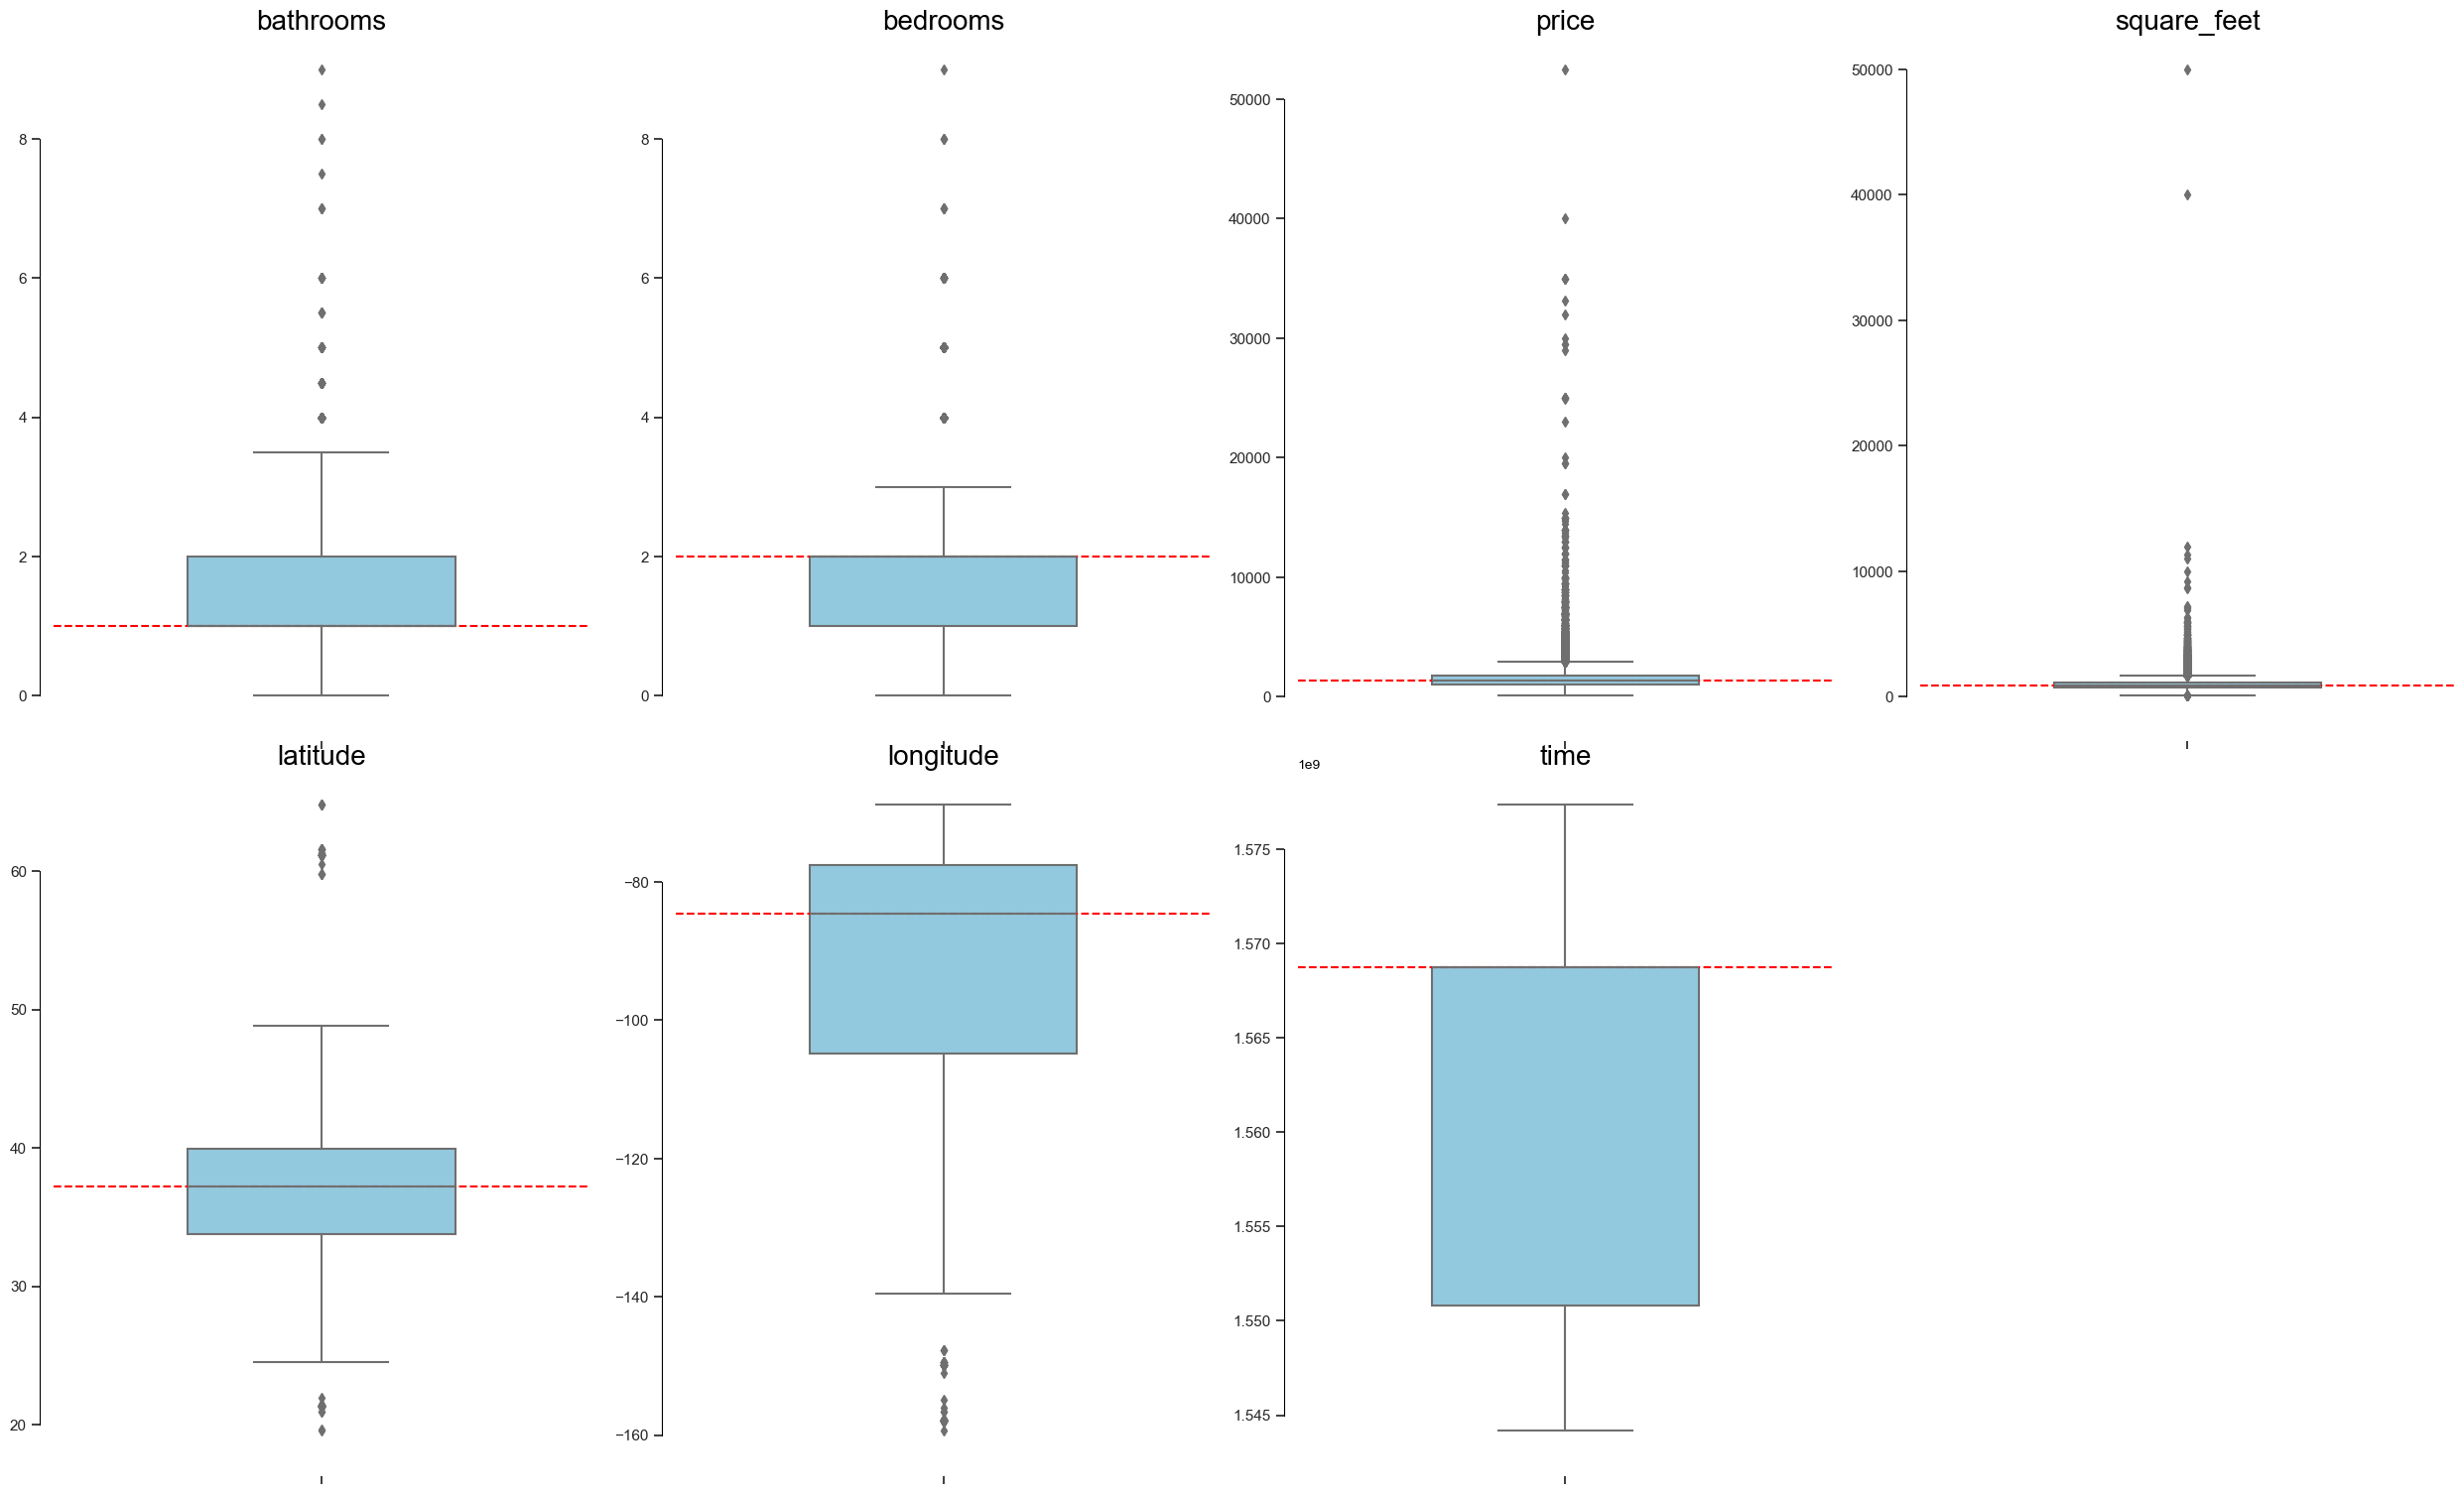

In [18]:
# get the columns which contains numeric values of dataset
num_cols = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude', 'time']

# check the distribution of numeric values
plt.figure(figsize=(25, 15))

for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col], showfliers=True, color='skyblue', width=0.5) 
    plt.yticks(fontsize=20)
    plt.axhline(df[col].median(), linestyle='--', color='red', linewidth=1.5)  # add median line
    plt.title(col, fontsize=20)
    plt.ylabel('')
    
sns.set_theme(context='notebook', style='whitegrid')
sns.despine(offset=10, trim=True)
plt.show()

The difference of 'price' and 'square_feet' are the most enormous. The outlier values are rare in the life. So check it whether it is reasonable.

In [19]:
# check the outliers of 'price'
check_cols = ['amenities', 'bathrooms', 'bedrooms', 'price', 'square_feet']
print(df.loc[df['price'] > 30000, check_cols])

                                               amenities  bathrooms  bedrooms  \
6863   basis,AC,Cable or Satellite,Internet Access,Pa...        1.0       0.0   
17131                                      basis,Parking        4.0       4.0   
28037  basis,Dishwasher,Elevator,Fireplace,Parking,Pa...        5.0       7.0   
38473     basis,Elevator,Fireplace,Parking,Patio/Deck,TV        9.0       6.0   
40715             basis,Elevator,Hot Tub,Patio/Deck,Pool        7.5       6.0   
40932  basis,Clubhouse,Elevator,Fireplace,Gated,Gym,P...        8.0       6.0   
45817                                      basis,Parking        2.5       3.0   

         price  square_feet  
6863   52500.0         1418  
17131  35000.0         2269  
28037  35000.0         5586  
38473  32000.0         5055  
40715  35000.0         6366  
40932  40000.0         7145  
45817  33165.0         2211  


What need to pay attention is the 6863 row. The price is $52500 with only one bathroom, no bedroom and 1418 square feet. We should delete this row. Other row's price seem to too high but it may be in prosperous location, which is reasonable to some extent.

In [20]:
# drop the 6863 row
df.drop([6863], inplace=True)

In [21]:
# check the outliers of 'square_feet'
check_cols = ['amenities', 'bathrooms', 'bedrooms', 'price', 'square_feet']
print(df.loc[df['square_feet'] > 30000, check_cols])

                                               amenities  bathrooms  bedrooms  \
7153   basis,Basketball,Cable or Satellite,Doorman,Ho...        1.0       1.0   
51672  basis,Cable or Satellite,Doorman,Gym,Storage,T...        1.0       1.0   

        price  square_feet  
7153   4790.0        40000  
51672  2640.0        50000  


Both 40000 square feet and 50000 square feet is equipped with only bathroom and one bedroom. However, the amenities is abundant. These two places might be places of recreation and cultural. So, it appear to be reasonable and we keep it in the data.

In [22]:
# the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99282 entries, 0 to 99491
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99282 non-null  int64  
 1   category       99282 non-null  object 
 2   title          99282 non-null  object 
 3   body           99282 non-null  object 
 4   amenities      99282 non-null  object 
 5   bathrooms      99282 non-null  float64
 6   bedrooms       99282 non-null  float64
 7   currency       99282 non-null  object 
 8   fee            99282 non-null  object 
 9   has_photo      99282 non-null  object 
 10  pets_allowed   99282 non-null  object 
 11  price          99282 non-null  float64
 12  price_display  99282 non-null  object 
 13  price_type     99282 non-null  object 
 14  square_feet    99282 non-null  int64  
 15  cityname       99282 non-null  object 
 16  state          99282 non-null  object 
 17  latitude       99282 non-null  float64
 18  longitude  

🔖 The datasets now are 99282*21 \
Summary of all the columns:
* `id`: It do not provide any useful information. So we drop it later
* `category`: It is the category of the apartment. Most of them are 'apartment' and other categories are the small proportion. But it is in complex format. So we need to clean it if we want to use it.
* `title`: The title of the rental advertisement. It contains the number of bedroom and the address.
* `body`: The content of the rental advertisement, containing detailed address, rental fee and the beds for rent.
* `amenities`: It contains the list of amenities for rent. The information need to be preprocessed later.
* `bathrooms, bedrooms`: The number of bathrooms, bedrooms.
* `currency`: The currency of the rental fee. All the currencies are in USD. So we can ignore this column later.
* `fee`: Whether the fee is required. Most of them are 'No' with 99086 and the very small proportion are 'Yes' with 197.
* `has_photo`: Whether the advertisement has photo. Most of them have photos or thumbnail.
* `pets_allowed`: The type of pets allowed. Cats and dogs are included only. However, there are too many null values.
* `price, price_display`: The price of the rental and the price displayed on the website. Both are usually the same.
* `price_type`: Rent payment cycle. Most of them are monthly.
* `square_feet`: The square feet of the rental house.
* `cityname, state`: The city and state of the rental house.
* `latitude, longitude`: The latitude and longitude of the rental house.
* `source`: The source of rental house advertisement. It represents the website which displays rental informantion. Most of the information are displayed in RentDigs.com.
* `time`: The time when the rental house advertisement is posted, is represented as the number of seconds since January 1, 1970


## Data Mining

📍The process will begin from the perspective of **real estate agency**. Two parts in this analysis:
1. rent pricing strategy
2. division of housing types

### 1. analysis of rent pricing strategy

In [23]:
# calculate the price per square foot
df['price_per_sqft'] = df['price'] / df['square_feet']

# extract the required columns
cols_price = ['category', 'amenities', 'bathrooms', 'bedrooms', 'price', 'square_feet', 'pets_allowed', 'price_type', 'price_per_sqft', 'state', 'longitude', 'latitude', 'time']
df_price = df[cols_price]

# only reserve the monthly price
df_price = df_price[df_price['price_type'] == 'Monthly']
del df_price['price_type']
df_price

,category,amenities,bathrooms,bedrooms,price,square_feet,pets_allowed,price_per_sqft,state,longitude,latitude,time
0,apartment,basis,1.0,1.0,2195.0,542,Cats,4.049815,CA,-118.3759,33.8520,1577360355
1,apartment,basis,1.5,3.0,1250.0,1500,"Cats,Dogs",0.833333,VA,-76.4941,37.0867,1577360340
2,apartment,basis,2.0,3.0,1395.0,1650,No,0.845455,NC,-78.6438,35.8230,1577360332
3,apartment,basis,1.0,2.0,1600.0,820,"Cats,Dogs",1.951220,CA,-121.9712,38.3622,1577360330
4,apartment,basis,1.0,1.0,975.0,624,"Cats,Dogs",1.562500,NM,-106.6110,35.1038,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...
99487,apartment,"basis,Gym,Parking,Patio/Deck,Playground,Storag...",1.0,1.0,780.0,605,No,1.289256,TX,-95.1998,29.6151,1544185770
99488,apartment,"basis,AC,Cable or Satellite,Clubhouse,Dishwash...",2.0,2.0,813.0,921,"Cats,Dogs",0.882736,FL,-81.7579,30.2254,1544185750
99489,apartment,"basis,Garbage Disposal,Refrigerator",1.0,1.0,1325.0,650,"Cats,Dogs",2.038462,CA,-117.0914,32.7379,1544185729
99490,apartment,"basis,Gym,Pool",1.0,1.0,931.0,701,"Cats,Dogs",1.328103,NC,-80.8451,35.4158,1544185670


#### (1) Compare the level of rental price of each state.

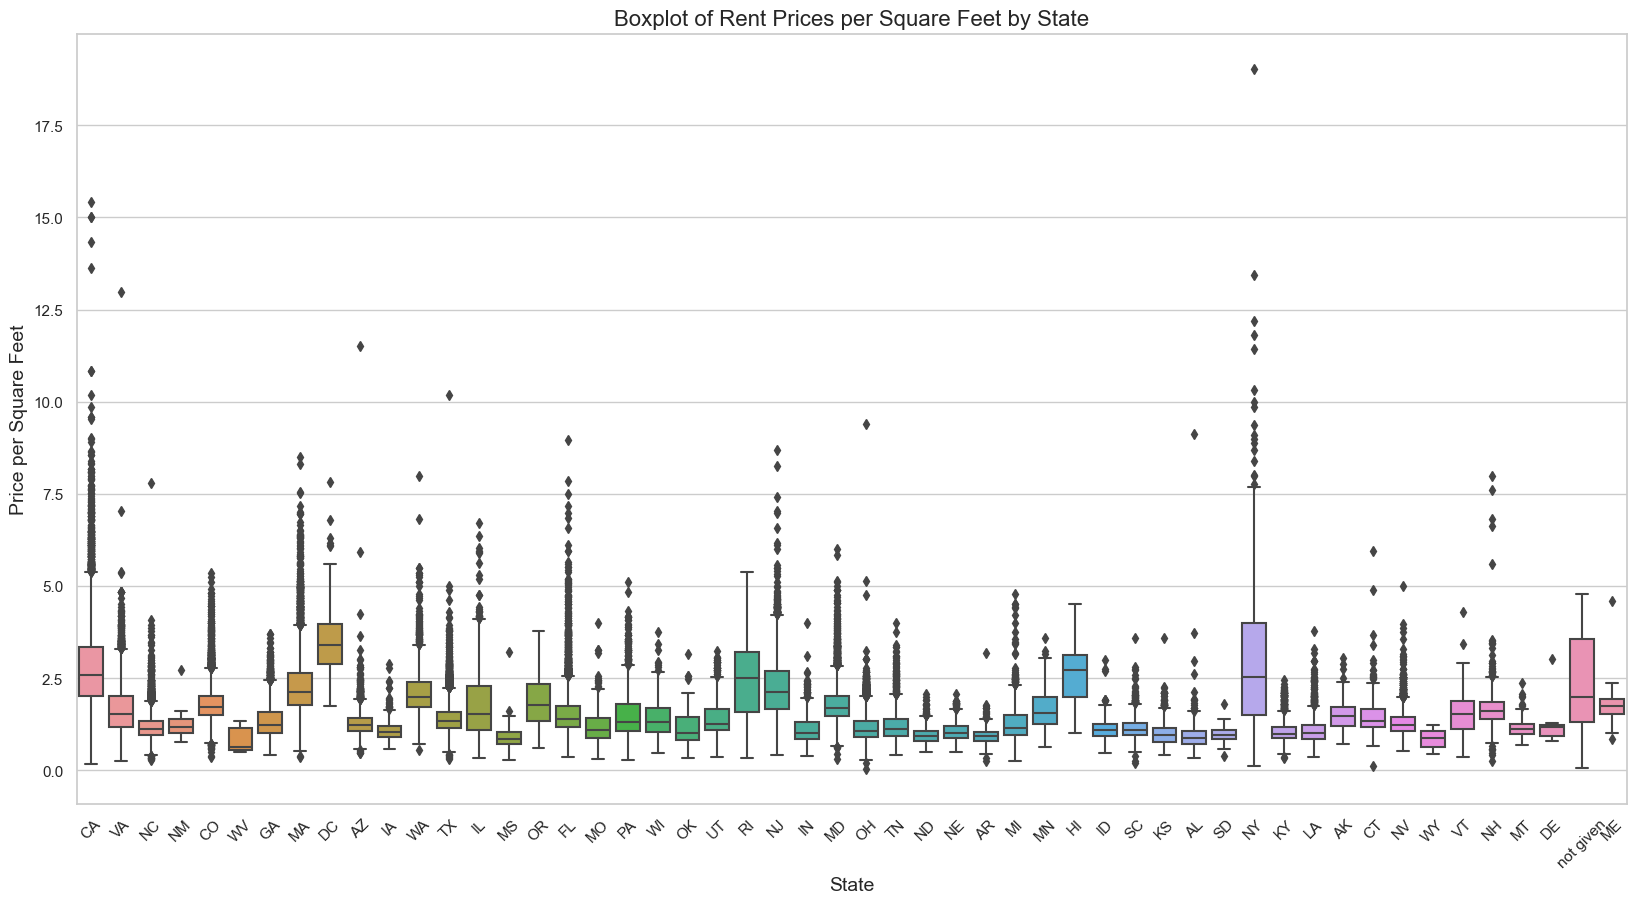

In [24]:
# draw box plots for each state
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_price, x='state', y='price_per_sqft')
plt.title('Boxplot of Rent Prices per Square Feet by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Price per Square Feet', fontsize=14)
plt.xticks(rotation=45)
plt.show()

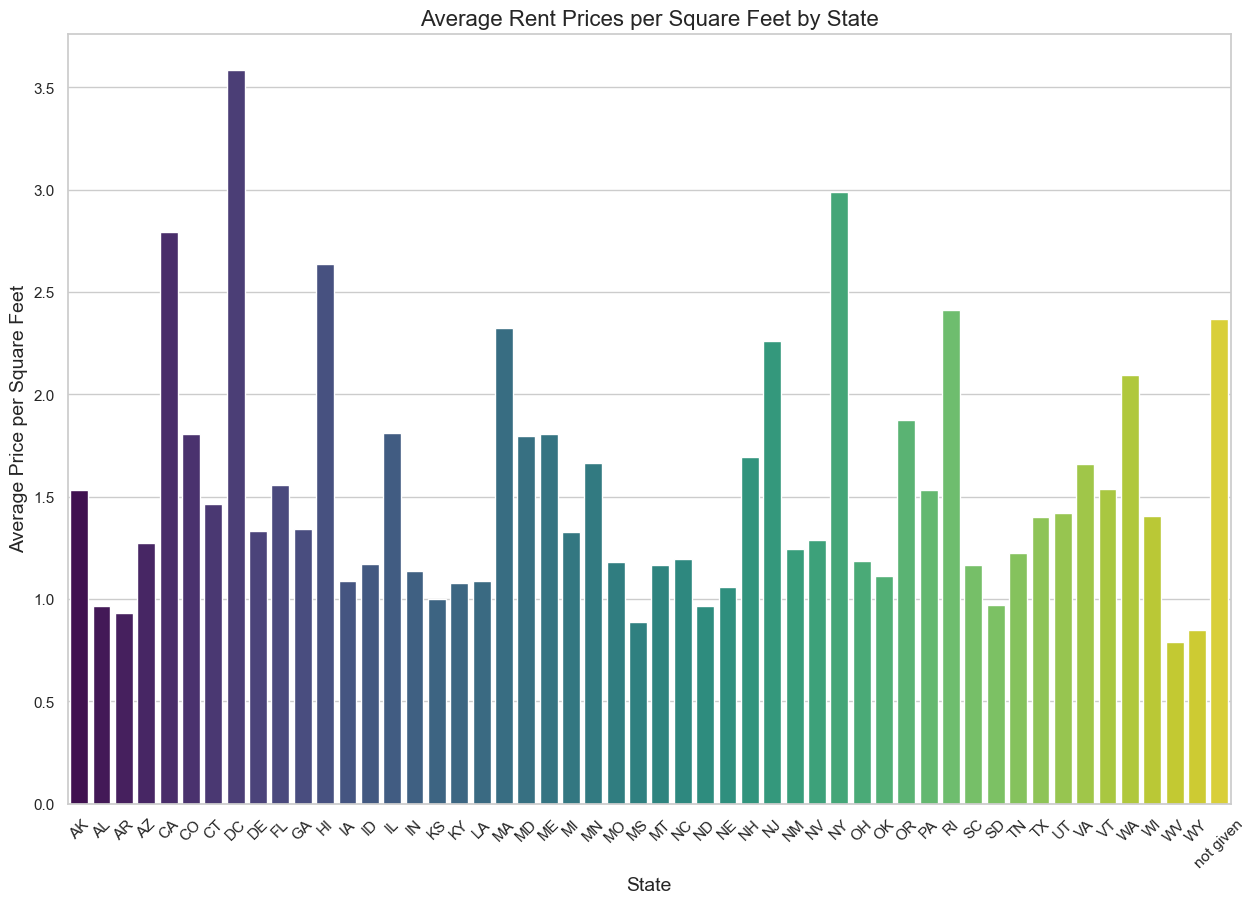

In [25]:
# calculate the average price per square foot by state
state_avg_price = df.groupby('state')['price_per_sqft'].mean().reset_index()

# plot bar chart
plt.figure(figsize=(15, 10))
sns.barplot(data=state_avg_price, x='state', y='price_per_sqft', palette='viridis')
plt.title('Average Rent Prices per Square Feet by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Price per Square Feet', fontsize=14)
plt.xticks(rotation=45)
plt.show()

🔖 From the above charts, some key points can be focused on:
* **High Rent States**: California (CA), New York (NY), and Washington, D.C. (DC) have higher median rent prices, indicating more expensive rental markets.

* **Affordable Rent States**: West Virginia (WV), Kentucky (KY), and South Dakota (SD) have lower median prices, reflecting more affordable rentals.

* **Outliers**: Significant outliers are present in many states, especially in CA, NY, and DC, indicating some exceptionally high-priced rentals.

* **Distribution Spread**: CA has a wide range of prices (large IQR), while states like SD and WV show more consistency (narrow IQR). States like HI and ME have fewer data points, indicating limited rental data.

* **General Trends**: Coastal states and those with major cities generally have higher rents, while Midwest and Southern states like NE, AL, and OH have lower rents.

#### (2) The variation of the price per square feet in each month.

In [26]:
# convert the time to year and month
df_price['time'] = pd.to_datetime(df_price['time'], unit='s')
df_price['year'] = df_price['time'].dt.year
df_price['month'] = df_price['time'].dt.month

df_price.head()

,category,amenities,bathrooms,bedrooms,price,square_feet,pets_allowed,price_per_sqft,state,longitude,latitude,time,year,month
0,apartment,basis,1.0,1.0,2195.0,542,Cats,4.049815,CA,-118.3759,33.8520,2019-12-26 11:39:15,2019,12
1,apartment,basis,1.5,3.0,1250.0,1500,"Cats,Dogs",0.833333,VA,-76.4941,37.0867,2019-12-26 11:39:00,2019,12
2,apartment,basis,2.0,3.0,1395.0,1650,No,0.845455,NC,-78.6438,35.8230,2019-12-26 11:38:52,2019,12
3,apartment,basis,1.0,2.0,1600.0,820,"Cats,Dogs",1.951220,CA,-121.9712,38.3622,2019-12-26 11:38:50,2019,12
4,apartment,basis,1.0,1.0,975.0,624,"Cats,Dogs",1.562500,NM,-106.6110,35.1038,2019-12-26 11:38:28,2019,12


In [27]:
# check the year and month
df_price.groupby('year')['month'].value_counts()

year  month
2018  12       16042
2019  9        43105
      2        31256
      12        7327
      7          464
      8          304
      6          172
      3          132
      1          128
      5          121
      4          115
      10          64
      11          49
Name: count, dtype: int64

We know that only Dec 2018 and the year 2019's information was included. \
To analyze the data conveniently, we can turn Dec in 2018 into month 0 because the year 2018 only includes one month.

c:\Users\admin\.conda\envs\gpu_torch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\admin\.conda\envs\gpu_torch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Price per Square Foot over Months')

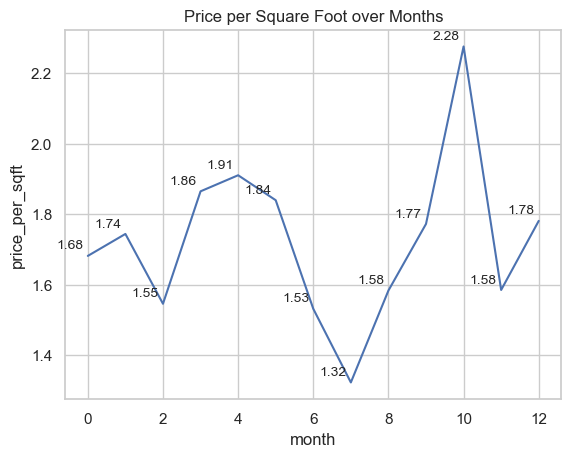

In [28]:
# convert Dec in 2018 to 0
df_price.loc[df_price['year']==2018, 'month'] = 0

# average price per month
price_avg_month = df_price.groupby('month')['price_per_sqft'].mean().reset_index()
sns.set_theme(style='whitegrid')
sns.lineplot(x='month', y='price_per_sqft', data=price_avg_month)

for idx, (x, y) in enumerate(zip(price_avg_month['month'], price_avg_month['price_per_sqft'])):
    plt.annotate(f'{y:.2f}', xy=(x, y), xytext=(-3, 3), textcoords='offset points',
                 ha='right', va='bottom', fontsize=10)
    
plt.title('Price per Square Foot over Months')

🔖 From the above line graph, we can focus on some key points:
* **Overall Trend**: The rent prices per square foot show considerable fluctuations over the months. We can see that the prices were lower in the summer months (June-August) compared to spring months (March-May) and winter months (November-February). Potential seasonal patterns in rental prices can be explored further.

* **Lowest Point**: The lowest price per square foot occurs in July, with a value of approximately $1.32. The reasons can be explored later by considering the factors such as seasonality, demand, supply, etc.

* **Highest Point**: The highest price per square foot occurs in October, with a value of approximately $2.28. This could be due to several reasons like festive season or other events that may affect the demand for housing.

#### (3) The impact of ancillary facilities (amenities, pets_allowed) on price per square foot

We need to preprocess the 'amenities' and 'pets_allowed' to numeric variables firstly. Count the number of amenities and pets allowed.

In [29]:
# data preprocessing
df_price['amenities_count'] = df_price['amenities'].apply(lambda x: len(x.split(',')))
df_price['pets_count'] = df_price['pets_allowed'].apply(lambda x: len(x.split(',')) if x != 'No' else 0)
df_price

,category,amenities,bathrooms,bedrooms,price,square_feet,pets_allowed,price_per_sqft,state,longitude,latitude,time,year,month,amenities_count,pets_count
0,apartment,basis,1.0,1.0,2195.0,542,Cats,4.049815,CA,-118.3759,33.8520,2019-12-26 11:39:15,2019,12,1,1
1,apartment,basis,1.5,3.0,1250.0,1500,"Cats,Dogs",0.833333,VA,-76.4941,37.0867,2019-12-26 11:39:00,2019,12,1,2
2,apartment,basis,2.0,3.0,1395.0,1650,No,0.845455,NC,-78.6438,35.8230,2019-12-26 11:38:52,2019,12,1,0
3,apartment,basis,1.0,2.0,1600.0,820,"Cats,Dogs",1.951220,CA,-121.9712,38.3622,2019-12-26 11:38:50,2019,12,1,2
4,apartment,basis,1.0,1.0,975.0,624,"Cats,Dogs",1.562500,NM,-106.6110,35.1038,2019-12-26 11:38:28,2019,12,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,apartment,"basis,Gym,Parking,Patio/Deck,Playground,Storag...",1.0,1.0,780.0,605,No,1.289256,TX,-95.1998,29.6151,2018-12-07 12:29:30,2018,0,7,0
99488,apartment,"basis,AC,Cable or Satellite,Clubhouse,Dishwash...",2.0,2.0,813.0,921,"Cats,Dogs",0.882736,FL,-81.7579,30.2254,2018-12-07 12:29:10,2018,0,14,2
99489,apartment,"basis,Garbage Disposal,Refrigerator",1.0,1.0,1325.0,650,"Cats,Dogs",2.038462,CA,-117.0914,32.7379,2018-12-07 12:28:49,2018,0,3,2
99490,apartment,"basis,Gym,Pool",1.0,1.0,931.0,701,"Cats,Dogs",1.328103,NC,-80.8451,35.4158,2018-12-07 12:27:50,2018,0,3,2


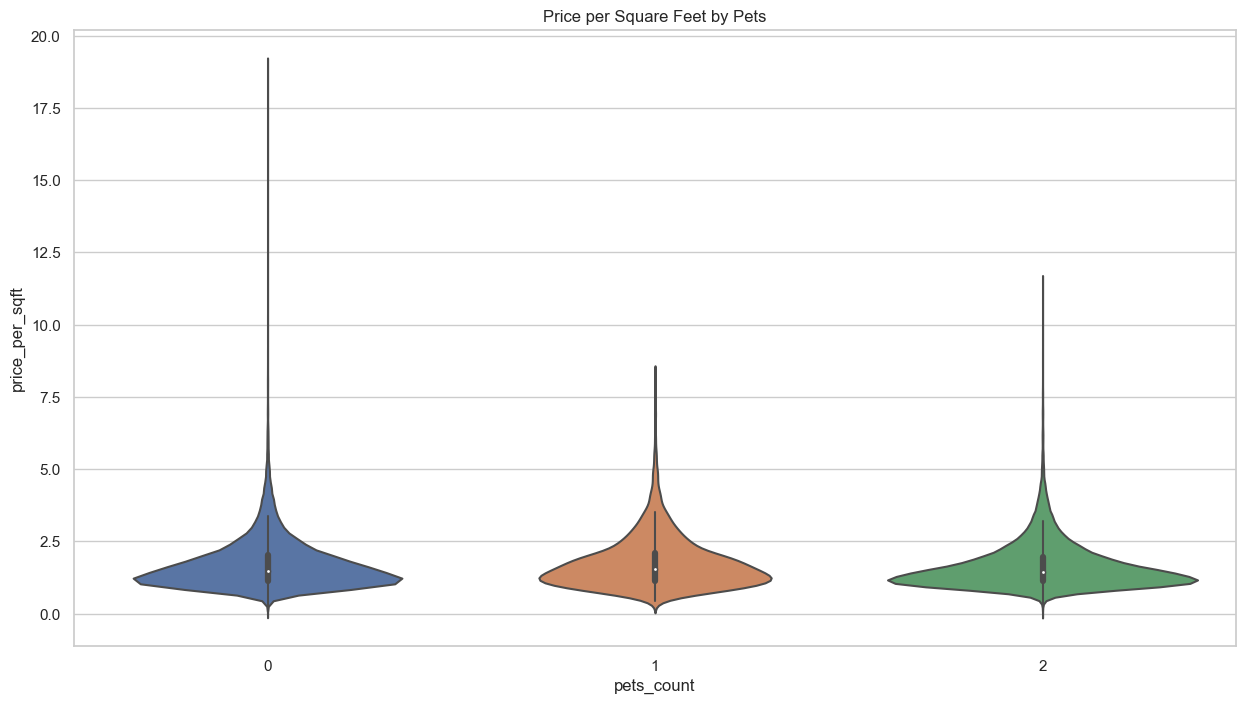

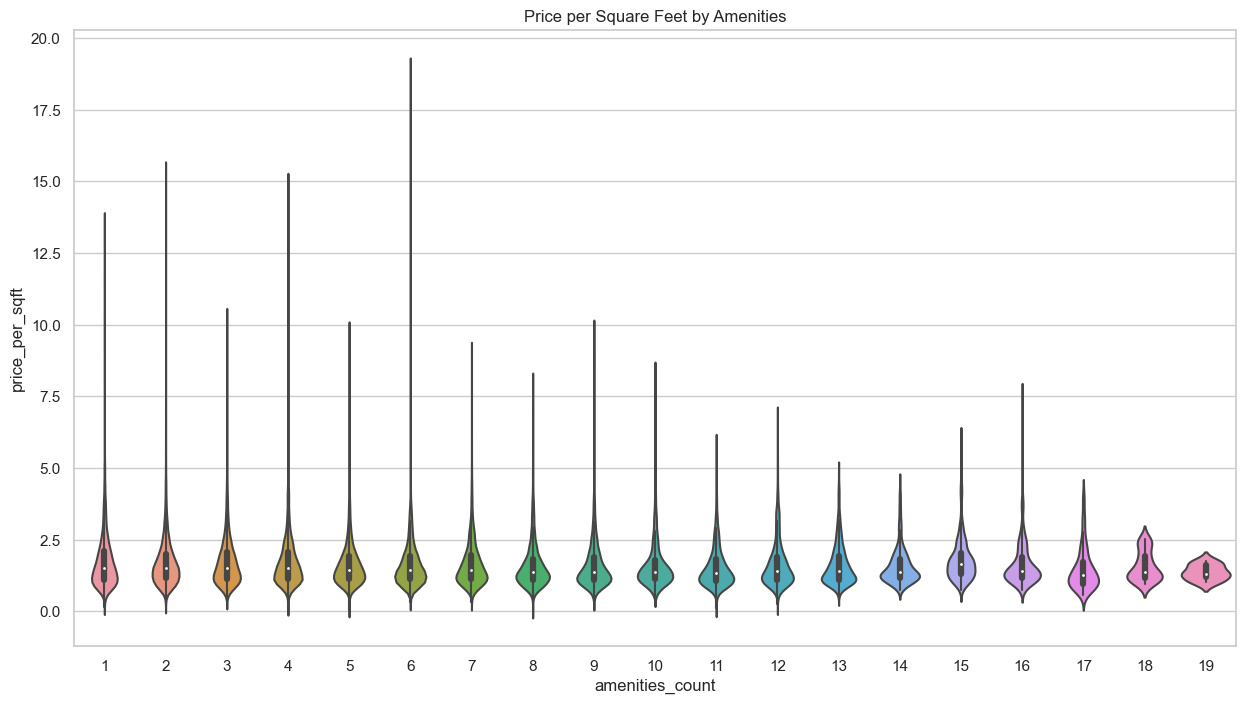

In [30]:
# visualize the data distribution of two columns using violin plot
pets_price = df_price.groupby('pets_count')['price_per_sqft'].mean().reset_index()
amenities_price = df_price.groupby('amenities_count')['price_per_sqft'].mean().reset_index()

plt.figure(figsize=(15, 8))
sns.violinplot(x='pets_count', y='price_per_sqft', data=df_price)
plt.title('Price per Square Feet by Pets')
plt.show()

plt.figure(figsize=(15, 8))
sns.violinplot(x='amenities_count', y='price_per_sqft', data=df_price)
plt.title('Price per Square Feet by Amenities')
plt.show()

From the violin plot, it is not the case that more facilities allowed lead to more higher price. To evaluate it further, we calculate the correlation between price and number of facilities.

In [31]:
# calculate the correlation between 'amenities_count' and 'price_per_sqft'
corr1 = df_price['amenities_count'].corr(df_price['price_per_sqft'])

# calculate the correlation between 'pets_count' and 'price_per_sqft'
corr2 = df_price['pets_count'].corr(df_price['price_per_sqft'])

print("correlation between 'amenities_count' and 'price_per_sqft': ", corr1)
print("correlation between 'pets_count' and 'price_per_sqft': ", corr2)

correlation between 'amenities_count' and 'price_per_sqft':  -0.053668361128420966
correlation between 'pets_count' and 'price_per_sqft':  -0.030459594570645468


🔖 The result of correlation: \
The correlation coefficients between 'amenities_count' and 'price_per_sqft' and between 'pets_count' and 'price_per_sqft' are approximately -0.053 and -0.030, respectively. These coefficients are close to zero, indicating that there is almost no linear relationship between the variables. \
That is, **the number of amenities and the number of pets have little effect on the price per square foot of the apartment.**

#### (4) Pricing policy (What really affect price?)

📍 From the above analysis, we know that the number of amenities and pets have little effect on price. But we really want to know what affects the price. And how to fix a price for rent. So this part will focus on two aspects:
* factors that affect the price
* pricing policy

Index(['category', 'amenities', 'bathrooms', 'bedrooms', 'price',
       'square_feet', 'pets_allowed', 'price_per_sqft', 'state', 'longitude',
       'latitude', 'time', 'year', 'month', 'amenities_count', 'pets_count'],
      dtype='object')


<function matplotlib.pyplot.show(close=None, block=None)>

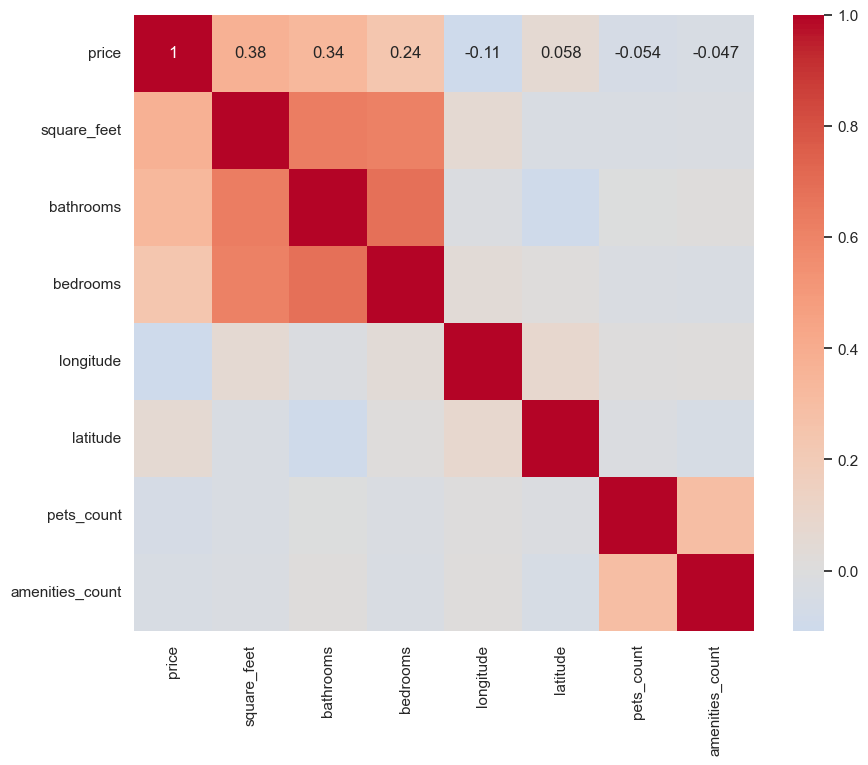

In [32]:
print(df_price.columns)

# factors that may affect price
factors = ['square_feet', 'bathrooms', 'bedrooms', 'longitude', 'latitude', 'pets_count', 'amenities_count']
df_corr = df_price[['price'] + factors]

# calculate correlation coffieient matrix
corr_matrix = df_corr.corr()

# plot heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

🔖 From the heat map, all variables affect price less. But it does not mean that price is not affected by these factors. We should consider whether these factors may have any theoretical significance or could be useful in a broader context. Some possible reasons are as follow: 
1. The outliers of price affect the result. We need to preprocess the data further.
2. Price is determined by the interaction of features, not by a single feature.

We deal with outliers further.

In [33]:
# get the mean and standard deviation of the price column
price_mean = df_corr['price'].mean()
price_std = df_corr['price'].std()

# delete outliers
df_corr = df_corr[np.abs(df_corr['price'] - price_mean) <= (3 * price_std)]

Apply linear regression to predict the price of an apartment based on given features.

📌 Ridge regression is used here to predict the price per square foot from several factors because the number of bathroom and bedroom may exist relationship and ridge can solve multicollinearity better compared with the ordinary linear regression. 

📌 From the EDA process, we know that the variation of price is enormous, which may affect the training of regression model. To improve the effect of ridge model, we introduce log transform to reduce the range and skewness of price.

In [34]:
# factors that affect price
reg_cols = ['square_feet', 'bathrooms', 'bedrooms', 'pets_count', 'amenities_count', 'latitude', 'longitude']

# features
X = df_corr[reg_cols]

# apply log transform to targets
y = np.log(df_corr['price'])

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create a ridge regression model and train it
ridge = Ridge(alpha=5.0)
ridge.fit(X_train_scaled, y_train)

# prediction
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

# evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Training R^2: {train_r2}')
print(f'Test R^2: {test_r2}')

Training MSE: 0.14668643525866884
Test MSE: 0.14211369666962223
Training R^2: 0.14821121020940264
Test R^2: 0.15416530000456874


🔖 The value of R2 on test set is only about 0.15. The fitting effect is poor. Some possible reasons may cause this issue:
1. Each state has a different pricing strategy and we should explore price in the state level to improve accurate.
2. There is a nonlinear relationship between these features and price, which cause the poor fitting effect of linear regression.

📌 Based on the possible reasons, we take TX (Texas) state as example to analyse its pricing strategy. And we apply random forest regression model to predict the price of the apartment in order to explore the nonlinear relationship between these features.

<function matplotlib.pyplot.show(close=None, block=None)>

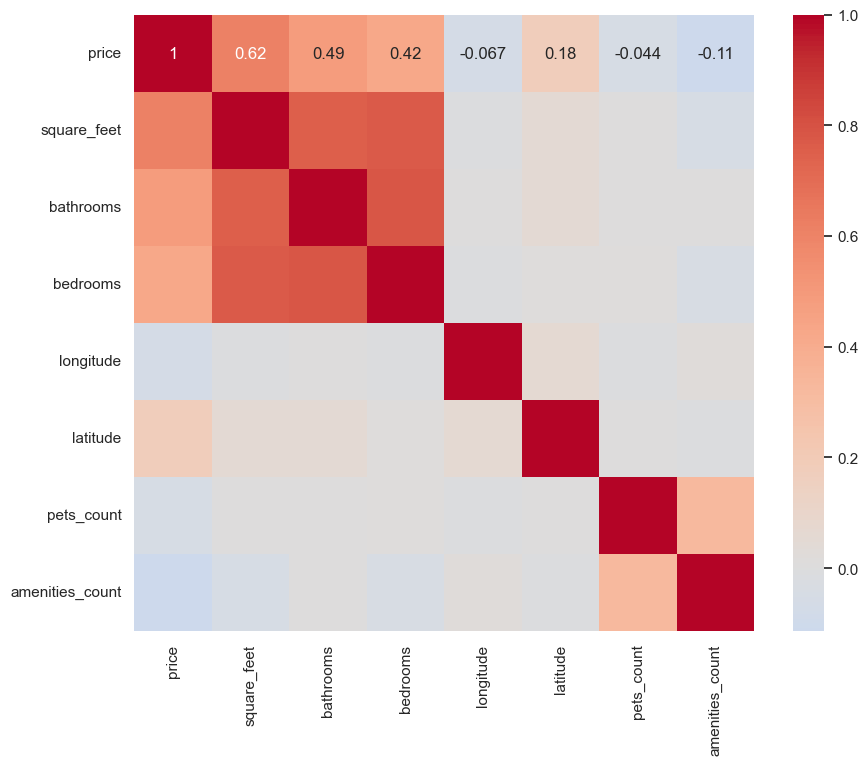

In [35]:
# factors that may affect price
factors = ['square_feet', 'bathrooms', 'bedrooms', 'longitude', 'latitude', 'pets_count', 'amenities_count']

# only focus on TX state
df_corr = df_price.loc[df_price['state'] == 'TX', ['price'] + factors]

# calculate correlation coffieient matrix
corr_matrix = df_corr.corr()

# plot heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show

In [36]:
# factors that affect price
reg_cols = ['square_feet', 'bathrooms', 'bedrooms', 'pets_count', 'amenities_count', 'latitude', 'longitude']

# features
X = df_corr[reg_cols]

# apply log transform to targets
y = np.log(df_corr['price'])

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create a RandomForestRegressor model and train it
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# prediction
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

# evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Training R^2: {train_r2}')
print(f'Test R^2: {test_r2}')

Training MSE: 0.003491754583511422
Test MSE: 0.02033066429844616
Training R^2: 0.9655684060980197
Test R^2: 0.7897625383238832


In [48]:
# feature importance
importances = rf.feature_importances_
print(importances)
indices = np.argsort(importances)[::-1]
print(indices)

[0.54132294 0.01272542 0.02037775 0.01130992 0.05797631 0.20786469
 0.14842296]
[0 5 6 4 2 1 3]


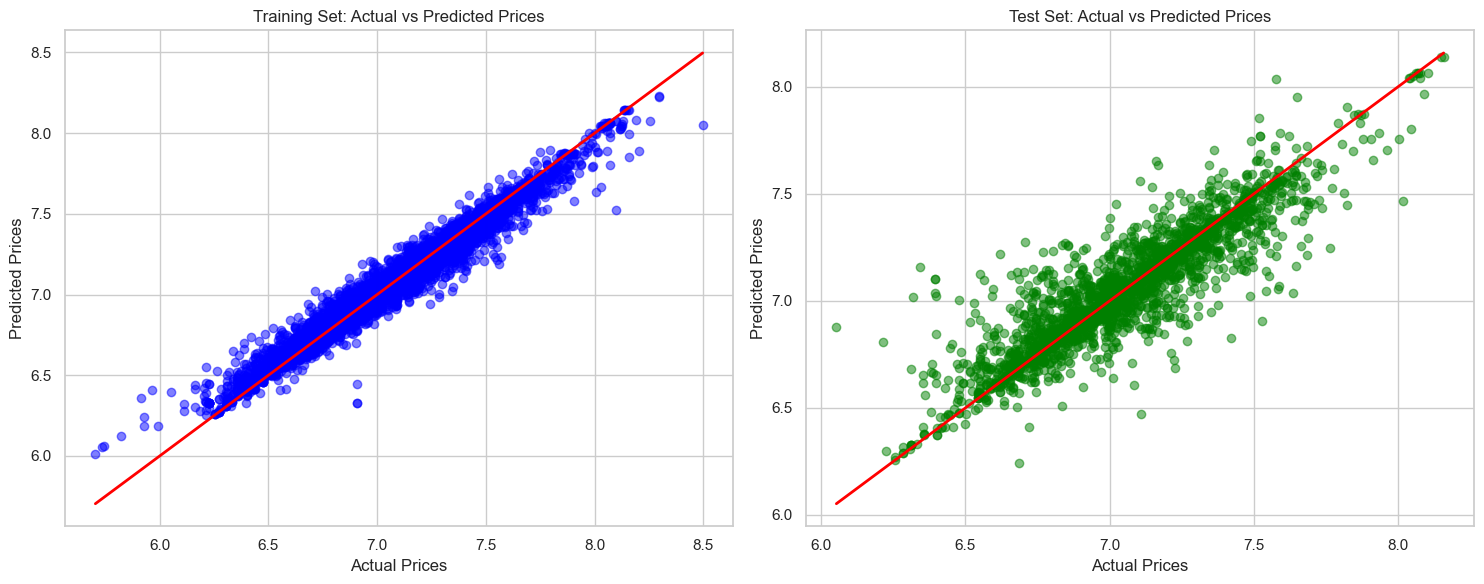

In [37]:
# visualize the fitting results
plt.figure(figsize=(15, 6))

# train set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Training Set: Actual vs Predicted Prices')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2)

# test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Test Set: Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

plt.tight_layout()
plt.show()

🔖 The fitting effect of model is improved significantly. For train set, the R2 value of 0.9656 indicates that the model explains approximately 96.56% of the variability in the target variable. For test set, the R2 value of 0.7898 suggests that the model explains approximately 78.98% of the variability in the target variable. Although overfitting may occur in the training set, the model still can be used in practice. More optimization techniques can be used to improve the model in the future.

### 2. Housing type analysis
📍 The 'category' column specify the type of rent. However, most of them are apartments, which provides few information. In this situation, we can apply cluster analysis to various features of houses. In this way, we can research intrinsic characteristics of each type of house and provide support for subsequent market analysis.

In [38]:
df.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'cityname', 'state',
       'latitude', 'longitude', 'source', 'time', 'price_per_sqft'],
      dtype='object')

In [39]:
# features that are considered
df['amenities_count'] = df_price['amenities_count']
df['pets_count'] = df_price['pets_count']
features = ['amenities_count', 'pets_count', 'bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude']
X = df.loc[df['price_type'] == 'Monthly', features]

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We firstly apply Kmeans algorithm to cluster the rent house.

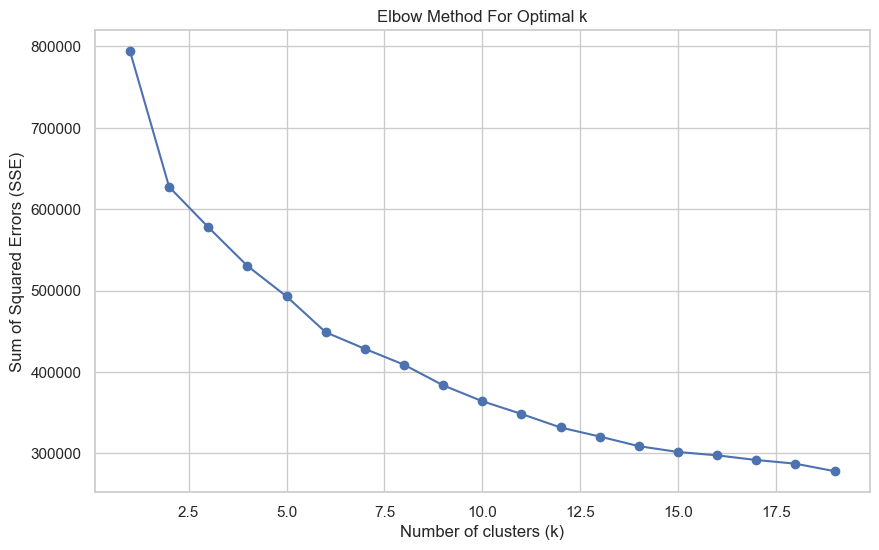

In [40]:
# find the optimal k value

# Elbow Method
sse = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

🔖 From the elbow curve, we know that the optimal number of clusters is 6. Prior to this point, increasing the number of clusters significantly reduces SSE, while after this point, the rate of SSE reduction slow significantly.

In [41]:
# use the optimal k to cluster
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# get lable of cluster
labels = kmeans.labels_

# add cluster label to data
X['cluster'] = labels

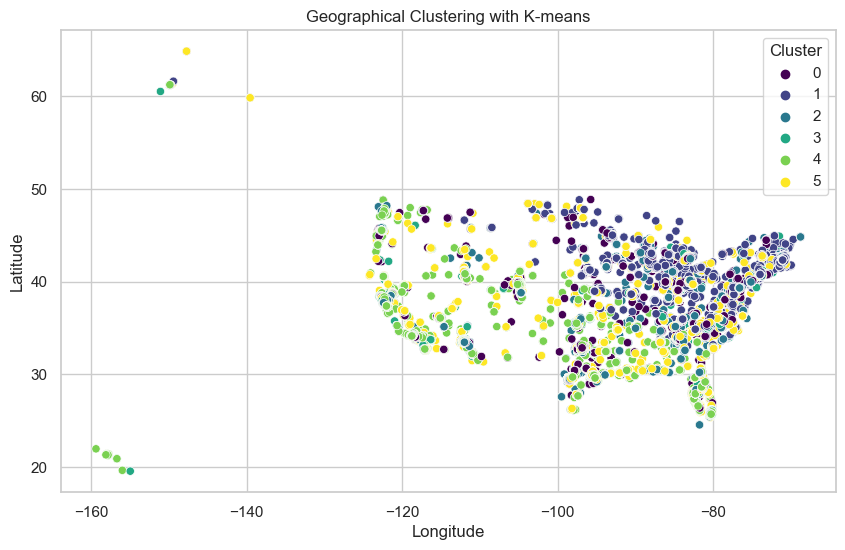

In [42]:
# visualize the cluster by latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=X, palette='viridis', legend='full')
plt.title('Geographical Clustering with K-means')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

Now, we divide the houses into six categories. Let's explore the features of each category of house.

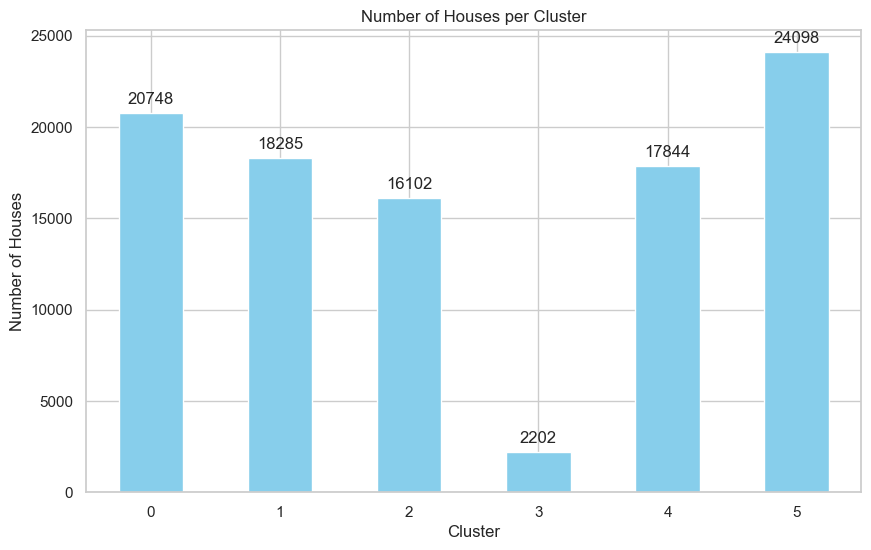

In [43]:
# the number of each category
cluster_counts = X.groupby('cluster').size()

# plot bar chart
plt.figure(figsize=(10, 6))
ax = cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Houses per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Houses')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

🔖 From the bar chart, the fifth type of house is the largest with 24098. What's more, the third type of house is far smaller than other categories with only 2202.

Let's explore the each features of houses based on the clusters.

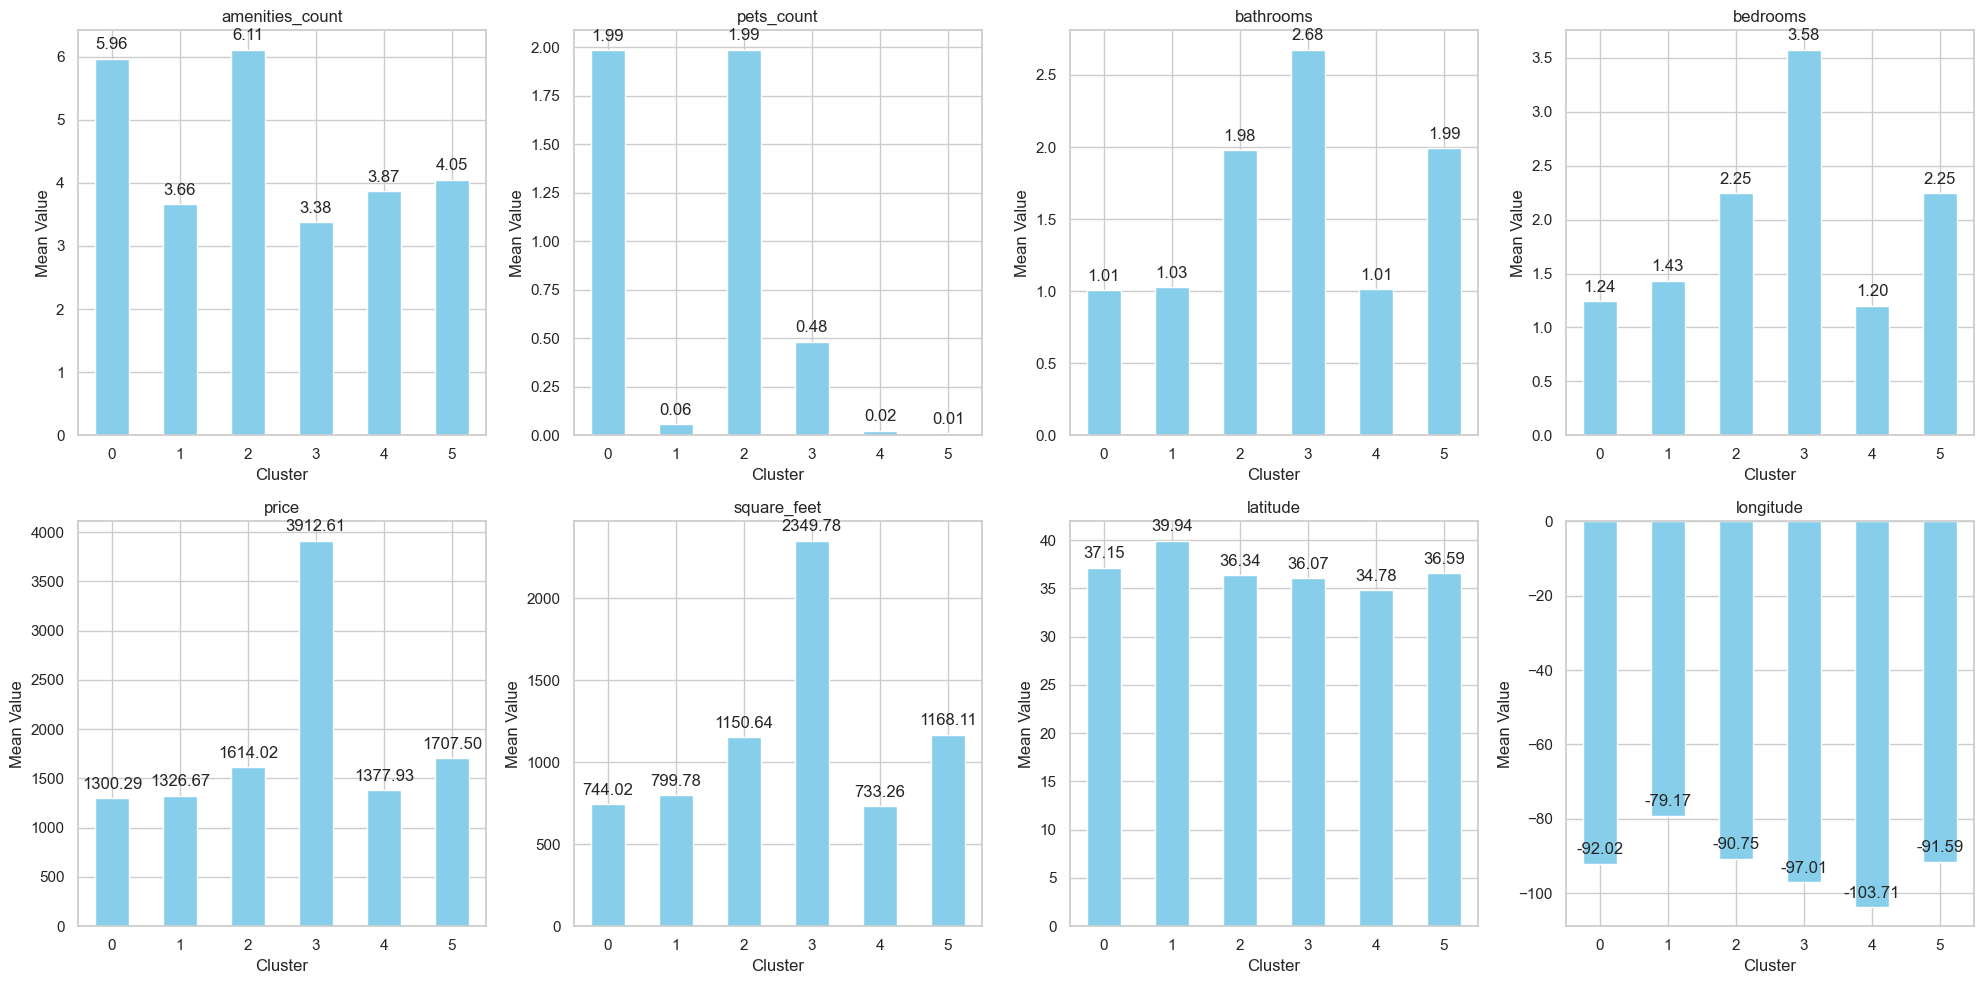

In [44]:
# calculate the mean value of each feature for each cluster
cluster_means = X.groupby('cluster').mean()

# visualize the results
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()
for i, feature in enumerate(features):
    cluster_means[feature].plot(kind='bar', ax=axes[i], title=feature, color='skyblue')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Mean Value')
    axes[i].tick_params(axis='x', rotation=0)
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.2f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

🔖 Summary of the characteristics of each type of house:
* **The third type of house**: It is obvious that the third type of house is the most expensive one with the smallest proportion, the most bedrooms and bathrooms, and the most square feet. But less amenities and pets are available in this type of house. It can be assumed that this type of housing is in high-end residential areas.

* **The zeroth and the second type of house**: The facilities in these two types of houses are more luxurious. More amenities and pets are allowed in these houses. However, their price and square feet are relatively low. We can assume that these houses are in retirement areas.

* **The first and the fourth type of house**: The feature values of these two types of houses are nearly the same and in the middle and lower level. And these two types of houses are basically equipped with one bedroom and one bathroom. We can assume that these houses are single rooms.

* **The fifth type of house**: The fifth type of house is more expensive than other type of houses except for the third category. It is basically equipped with two bedroom and two bathroom. We can assume that the type of house is twin room.

According to the above analysis, we have known that different type of housing in the market and their characteristics. Subsequently, the supply of different types of houses can be adjusted based on market conditions.